## Important formuals :

### - regression algorithm ---> Y = bx +  α
### - hypothesis ---> hθ(x) = θ0 + θ1x
### - cost function ---> J(θ0,θ1) = J(θ0 + θ1) = 1/2m m∑n=1(hθ(xi)-yi)^2
### - gradient descent :
### θ0 := θ0 - α 1/m m∑n=1(hθ(xi)-yi)x0
### θ1 := θ1 - α 1/m m∑n=1(hθ(xi)-yi)xi
### - data rescaling ---> x = [(x - mean)/range] 
#### mean = (sum of values / num of them) , range = (max - min)
### - normal equation ---> θ = (XT * X)^-1 * (XT) * (y)

## import libraries :

In [1]:
# use numpy to perform a mathematical operations on arrays.
import numpy as np
# use pandas to deal with dataset.
import pandas as pd
# use matplotlib to create static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# read data

In [6]:
# specify the specific location of dataset.
path = 'E:\\Mostafa\\Study Materials\\Machin Learning Courses\\Hesham Asem Courses\\Practice\\Supervised Learning\\Regression\\Multivariable Regression\\data.xlsx'
# read data from file in the specific location and add no headers.
# add names for columns Size for first column , Bedrooms for the second column and Price for third column.
df = pd.read_excel(path, header=None, names=['Size', 'Bedrooms', 'Price'])

# show data

In [7]:
# print first 10 row of data.
print('data : \n' ,df.head(10) )
print('---------------------------------------')
# use describe method to see all important information about data like mean , std , min , etc.
print('describtion of data : \n',df.describe())
print('---------------------------------------')

data : 
    Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500
---------------------------------------
describtion of data : 
               Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
---------------------------------------


# data rescaling

In [9]:
# use rescaling formula tp make all values be in range (-1,1)
# rescaling_df = [(df - mean)/range] or rescaling_df = [(df - mean ) / std] , std ---> standard divisaion
df = (df - df.mean()) / df.std()
print('data after normalization : ')
# print first 10 rows of data after rescaling
print(df.head(10) )

data after normalization : 
       Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389
5 -0.019732  1.090417 -0.323998
6 -0.587240 -0.223675 -0.204036
7 -0.721881 -0.223675 -1.130948
8 -0.781023 -0.223675 -1.026973
9 -0.637573 -0.223675 -0.783051


# adding a new column called ones before the data :

In [10]:
# add new column to represent X0 with value 1 for all rows.
# add it in index 0 to be first column in dataset
df.insert(0, 'Ones', 1)
# print first 10 row of new data.
print('Data after adding column "Ones" : \n' ,df.head(10) )

Data after adding column "Ones" : 
    Ones      Size  Bedrooms     Price
0     1  0.130010 -0.223675  0.475747
1     1 -0.504190 -0.223675 -0.084074
2     1  0.502476 -0.223675  0.228626
3     1 -0.735723 -1.537767 -0.867025
4     1  1.257476  1.090417  1.595389
5     1 -0.019732  1.090417 -0.323998
6     1 -0.587240 -0.223675 -0.204036
7     1 -0.721881 -0.223675 -1.130948
8     1 -0.781023 -0.223675 -1.026973
9     1 -0.637573 -0.223675 -0.783051


# separate X (training data) from y (target variable) :

In [12]:
# shape method return 'number of rows' X 'number of columns' ---> (47, 4).
# we use data.shape[1] to select only columns ---> (4) ---> ['Ones','Size','Bedrooms','Price'].
cols = df.shape[1]
# X represent taining data that will used in training to predict new targets.
# use ( : , ) to select all rows of data.
# use ( , 0 : cols-1) to select columns from first to penultimate one ---> [Ones : Bedrooms]. 
X = df.iloc[ : , 0 : cols-1 ]
# y represnt target variable that produced based on training data.
# use ( : , ) to select all rows of data.
# use ( , cols-1 : cols) to select last column only ---> [Price].
y = df.iloc[ : , cols-1 : cols ]
# print first 10 row of X values.
print('X data : \n' ,X.head(10) )
print('---------------------------------------')
# print first 10 row of y values.
print('y data : \n' ,y.head(10) )

X data : 
    Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417
5     1 -0.019732  1.090417
6     1 -0.587240 -0.223675
7     1 -0.721881 -0.223675
8     1 -0.781023 -0.223675
9     1 -0.637573 -0.223675
---------------------------------------
y data : 
       Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389
5 -0.323998
6 -0.204036
7 -1.130948
8 -1.026973
9 -0.783051


# convert from data frames to numpy matrices and initialize theta

In [13]:
# convert X to matrix with shape (47,3) to be prepared to work with it.
X = np.matrix(X.values)
# convert y to matrix with shape (47,1) to be prepared to work with it.
y = np.matrix(y.values)
# craete new matrix with shape (1,3) called theta with only 3 values.
# because we have only 3 variables so theta represented by 3 columns.
theta = np.matrix(np.array([0,0,0]))
# print first 10 values of 'X' matrix.
print('first 10 values of X : \n',X[0:10])
print('---------------------------------------')
# print values of 'theta' matrix.
print('theta :\n',theta)
print('---------------------------------------')
# print first 10 values of 'y' matrix.
print('first 10 values of y : \n',y[0:10])

first 10 values of X : 
 [[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]
 [ 1.         -0.01973173  1.09041654]
 [ 1.         -0.5872398  -0.22367519]
 [ 1.         -0.7218814  -0.22367519]
 [ 1.         -0.78102304 -0.22367519]
 [ 1.         -0.63757311 -0.22367519]]
---------------------------------------
theta :
 [[0 0 0]]
---------------------------------------
first 10 values of y : 
 [[ 0.47574687]
 [-0.08407444]
 [ 0.22862575]
 [-0.86702453]
 [ 1.59538948]
 [-0.32399786]
 [-0.20403615]
 [-1.13094828]
 [-1.02697347]
 [-0.78305133]]


# cost function

In [17]:
# use this formula to calculate cost-function.
# hθ(x) = θ0 + θ1x.
# J(θ0 + θ1) = 1/2m m∑n=1(hθ(xi)-yi)^2.
# use theta.T to calculate hθ(x).
# to multiply 2 matrix it's dimansions must be under this formula A'col' = B'row'.
# so number of columns of 'X' must equal to number of rows of 'theta'.
# so we must transpose 'theta' to fit the multiplication with 'X'.
# x = (47,3) , theta.T = (3,1).
# new matrix shape will equal (47,1).
def computeCost(X, y, theta):
    # apply summation part of formula ---> m∑n=1(hθ(xi)-yi)^2.
    z = np.power(((X * theta.T) - y), 2)
    # calculate number of all data points in this dataset.
    m = len(X)
    # apply the other part of formula division by 2m which refer to the number of all data points.
    return np.sum(z) / (2 * m)
# print the value of cost function.
print('Cost-Function = ' , computeCost(X, y, theta))

Cost-Function =  0.48936170212765967


# Gradient Descent function :

In [37]:
# use this formula to calculate gradient descent :
        # θ0 := θ0 - α 1/m m∑n=1(hθ(xi)-yi)
        # θ1 := θ1 - α 1/m m∑n=1((hθ(xi)-yi)xi)
def gradientDescent(X, y, theta, alpha, iters):
    # create a numpy array and convet it to matrix based on theta shape ---> (1,3) ---> [0. 0. 0.].
    # the new value will be a matrix ---> [[0. 0. 0.]].
    temp = np.matrix(np.zeros(theta.shape))
    # get number of parameters by convert number of columns in theta to integar.
    # calculate and assign number of parameters 'columns' in the theta array to 'parameters' variable.
    parameters = int(theta.ravel().shape[1])
    # create numpy array of zeros based on number of iterations.
    # it will represent array of 1000 zero 
    cost = np.zeros(iters)
    for i in range(iters):
        # calculate error by apply this part of formula m∑n=1(hθ(x^i)-y^i).
        error = (X * theta.T) - y
        for j in range(parameters):
            # apply the other part of formula by multiply by 'xi'
            term = np.multiply(error, X[:,j])
            # apply complete formula θ(0,1) - α 1/m m∑n=1((hθ(xi)-yi)xi)
            # temp[0,j] refer to new theta --->  θ(0,1) :=  θ(0,1) - α 1/m m∑n=1(hθ(xi)-yi 
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            # assign value of temp to theta to save new values of theta
            theta = temp
            # assign values of cost to cost function
            cost[i] = computeCost(X, y, theta)
    return theta, cost

# initialize variables for learning rate and iterations :

In [29]:
# learning rate.
# when it being small that means it will be slow but more accurated.
# when it being large that means it will be fast but less accurated.
alpha = 0.01
# number of iterations.
# when this number being large this mean that will be low cost.
# when this number being small this mean that will be high cost.
iters = 1000

# perform gradient descent to "fit" the model parameters :

In [30]:
# get values of hθ_(x) and theta from gradientDescent() method. 
hθ_x, cost = gradientDescent(X, y, theta, alpha, iters)

# get the cost (error) of the model

In [31]:
# print values of hθ_(x) ---> values of (θ0 , θ1).
print('hθ(x) = ' , hθ_x)
print('---------------------------------------')
# print cost of first 20 values.
print('cost : \n' , cost[0:20])
print('---------------------------------------')
# print the value of cost function
print('cost_function = ' , computeCost(X, y, hθ_x))

hθ(x) =  [[-1.10868761e-16  8.78503652e-01 -4.69166570e-02]]
---------------------------------------
cost : 
 [0.4805491  0.47198588 0.46366462 0.45557814 0.44771948 0.44008189
 0.43265881 0.42544389 0.41843096 0.41161404 0.40498735 0.39854524
 0.39228228 0.38619317 0.38027278 0.37451612 0.36891839 0.36347488
 0.35818107 0.35303254]
---------------------------------------
cost_function =  0.13070336960771892


# get best fit line for Size vs. Price


In [32]:
# sperate values between min and max to 100 part.
x = np.linspace(df.Size.min(), df.Size.max(), 100)
# print the 100 values between min and max.
print('x : \n ',x)
print('---------------------------------------')
print('hθ(x) : \n ',hθ_x)
print('---------------------------------------')
# apply this formula hθ(x) = θ0 + θ1x.
f = hθ_x[0, 0] + (hθ_x[0, 1] * x)
print('f : \n ',f)

x : 
  [-1.44542274 -1.39933471 -1.35324669 -1.30715866 -1.26107063 -1.21498261
 -1.16889458 -1.12280656 -1.07671853 -1.0306305  -0.98454248 -0.93845445
 -0.89236643 -0.8462784  -0.80019038 -0.75410235 -0.70801432 -0.6619263
 -0.61583827 -0.56975025 -0.52366222 -0.47757419 -0.43148617 -0.38539814
 -0.33931012 -0.29322209 -0.24713406 -0.20104604 -0.15495801 -0.10886999
 -0.06278196 -0.01669394  0.02939409  0.07548212  0.12157014  0.16765817
  0.21374619  0.25983422  0.30592225  0.35201027  0.3980983   0.44418632
  0.49027435  0.53636238  0.5824504   0.62853843  0.67462645  0.72071448
  0.7668025   0.81289053  0.85897856  0.90506658  0.95115461  0.99724263
  1.04333066  1.08941869  1.13550671  1.18159474  1.22768276  1.27377079
  1.31985881  1.36594684  1.41203487  1.45812289  1.50421092  1.55029894
  1.59638697  1.642475    1.68856302  1.73465105  1.78073907  1.8268271
  1.87291513  1.91900315  1.96509118  2.0111792   2.05726723  2.10335525
  2.14944328  2.19553131  2.24161933  2.287707

# draw the line for Size vs. Price

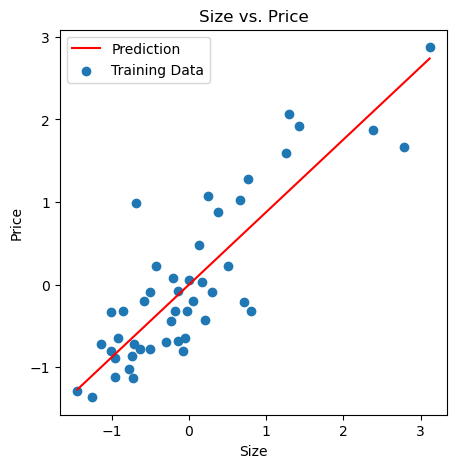

In [33]:
# make subplots to draw more plots in one graph.
fig, ax = plt.subplots(figsize=(5,5))
# draw the linear regression line.
ax.plot(x, f, 'r', label='Prediction')
# draw the distribution of data.
ax.scatter(df.Size, df.Price, label='Training Data')
# plot hint of all graphs types in the upper left side
ax.legend(loc=2)
# set name of x axis to Size.
ax.set_xlabel('Size')
# set name of y axis to Price.
ax.set_ylabel('Price')
# set the title of graph to be Predicted Size vs. Price.
ax.set_title('Size vs. Price')
# show graph on screen.
plt.show()

# get best fit line for Bedrooms vs. Price

In [34]:
# sperate values between min and max to 100 part.
x1 = np.linspace(df.Bedrooms.min(), df.Bedrooms.max(), 100)
# print the 100 values between min and max.
print('x : \n ',x1)
print('---------------------------------------')
print('hθ(x) : \n ',hθ_x)
print('---------------------------------------')
# apply this formula hθ(x) = θ0 + θ1x.
f1 = hθ_x[0, 0] + (hθ_x[0, 1] * x)
print('f : \n ',f)

x : 
  [-2.85185864 -2.79876402 -2.74566941 -2.69257479 -2.63948018 -2.58638556
 -2.53329095 -2.48019633 -2.42710172 -2.3740071  -2.32091249 -2.26781787
 -2.21472325 -2.16162864 -2.10853402 -2.05543941 -2.00234479 -1.94925018
 -1.89615556 -1.84306095 -1.78996633 -1.73687172 -1.6837771  -1.63068249
 -1.57758787 -1.52449326 -1.47139864 -1.41830403 -1.36520941 -1.3121148
 -1.25902018 -1.20592557 -1.15283095 -1.09973634 -1.04664172 -0.99354711
 -0.94045249 -0.88735788 -0.83426326 -0.78116865 -0.72807403 -0.67497942
 -0.6218848  -0.56879019 -0.51569557 -0.46260096 -0.40950634 -0.35641173
 -0.30331711 -0.25022249 -0.19712788 -0.14403326 -0.09093865 -0.03784403
  0.01525058  0.0683452   0.12143981  0.17453443  0.22762904  0.28072366
  0.33381827  0.38691289  0.4400075   0.49310212  0.54619673  0.59929135
  0.65238596  0.70548058  0.75857519  0.81166981  0.86476442  0.91785904
  0.97095365  1.02404827  1.07714288  1.1302375   1.18333211  1.23642673
  1.28952134  1.34261596  1.39571057  1.44880

# draw the line for Bedrooms vs. Price

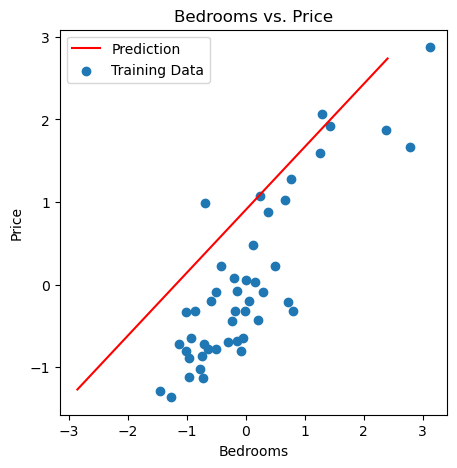

In [35]:
# make subplots to draw more plots in one graph.
fig, ax = plt.subplots(figsize=(5,5))
# draw the linear regression line.
ax.plot(x1, f1, 'r', label='Prediction')
# draw the distribution of data.
ax.scatter(df.Size, df.Price, label='Training Data')
# plot hint of all graphs types in the upper left side
ax.legend(loc=2)
# set name of x axis to Bedrooms.
ax.set_xlabel('Bedrooms')
# set name of y axis to Price.
ax.set_ylabel('Price')
# set the title of graph to be Predicted Bedrooms vs. Price.
ax.set_title('Bedrooms vs. Price')
# show graph on screen.
plt.show()

# draw error graph

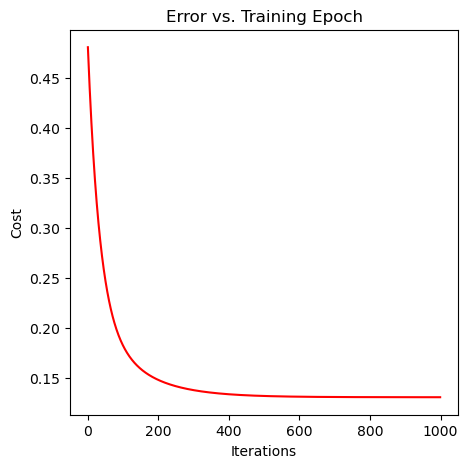

In [36]:
# make subplots to draw more plots in one graph.
fig, ax = plt.subplots(figsize=(5,5))
# draw error rate
ax.plot(np.arange(iters), cost, 'r')
# set name of x axis to Iterations.
ax.set_xlabel('Iterations')
# set name of y axis to Cost.
ax.set_ylabel('Cost')
# set the title of graph to be Error vs. Training Epoch.
ax.set_title('Error vs. Training Epoch')
plt.show()